# STAT610 - Applied Linear Regression

## Homework 1 (20 points total)

> <u>INSTRUCTIONS:</u> 
> 
> Complete the problems listed below.
> 
> <ul>
  <li>The assignment may be completed in this notebook or in a separate document</li>
  <li>Homework must be submitted individually</li>
  <li>To receive full credit, include relevant R code/output and answer all questions</li>
  <li>Upload your assignment to Canvas under Assignments > Homework 1.</li>
  <li>Use the following file naming convention:  Lastname_Firstname_HW1 (but put your own name instead).</li>
  <li>The assignment must be submitted in .html or .pdf </li>
</ul>



###  (12 points) Problem 1: 

Refer to the CDI.txt dataset included with the posted assignment. A detailed description of the CDI dataset is located in Appendix C.2 of the textbook. The number of active physicians in a CDI (Y) is expected to be related to total population, number of hospital beds, and total personal income.

<ol type="a">
    <li> Regress the number of active physicians separately on each of the three predictor variables mentioned above. Regressions must be performed BY "HAND"/CODE (i.e. without the use of $\texttt{lm()}$). <br>
        - (2 points) Write the corresponding fitted regression equations for each variable ($e.g. \hat{Y}=...$) <br>
        - (2 points) What increase in the number of active physicians is associated with a 1000 unit increase in total personal income? What does this suggest?</li> <br>
    <li> (2 points) Plot the three estimated regression functions and data on separate graphs. Use the R function $\texttt{abline(a=?, b=?)}$ where $a$ is your intercept estimate and $b$ is your slope estimate. <br>
        - (2 points) Does a linear regression appear to provide a good fit for each of the three predictor variables? Justify your claims. </li><br>
    <li> Calculate MSE [by code, without $\texttt{lm()}$] for each of the three predictor variables.  <br>
        - (2 points) Which predictor variable leads to the smallest MSE? <br>
        - (2 points) What does it mean to have a small MSE?  </li>
</ol>




###  (6 points) Problem 2: 

Refer to the CDI.txt dataset included with the posted assignment. A detailed description of the CDI dataset is located in Appendix C.2 of the textbook.

<ol type="a">
    <li> For each geographic region, regress per capita income in a CDI (Y) against the percentage of individuals in a county having at least a bachelors degree. You may now use the built-in $\texttt{lm()}$ R function. <br> 
        - (2 points) Write the corresponding fitted regression equations for each region ($e.g. \hat{Y}=...$) 
    </li> <br>
    <li> (2 points) Are the estimated regression functions similar for the four regions? Explain your answer. </li><br>
    <li> Calculate MSE using the R function $\texttt{lm()}$ for each region.  <br>
        - (2 points) Is MSE approximately the same across the four regions? Explain your answer.
</ol>




###  (2 points) Problem 3:

Refer to the CDI.txt dataset included with the posted assignment. A detailed description of the CDI dataset is located in Appendix C.2 of the textbook.

<ol type="a">
    <li> The code block below calculates log likelihoods associated with different slope values.  <br>
        - (2 points) Explain what you observe in this plot. How would you use this plot to find the slope estimate? <br>
        </li> <br>
</ol>




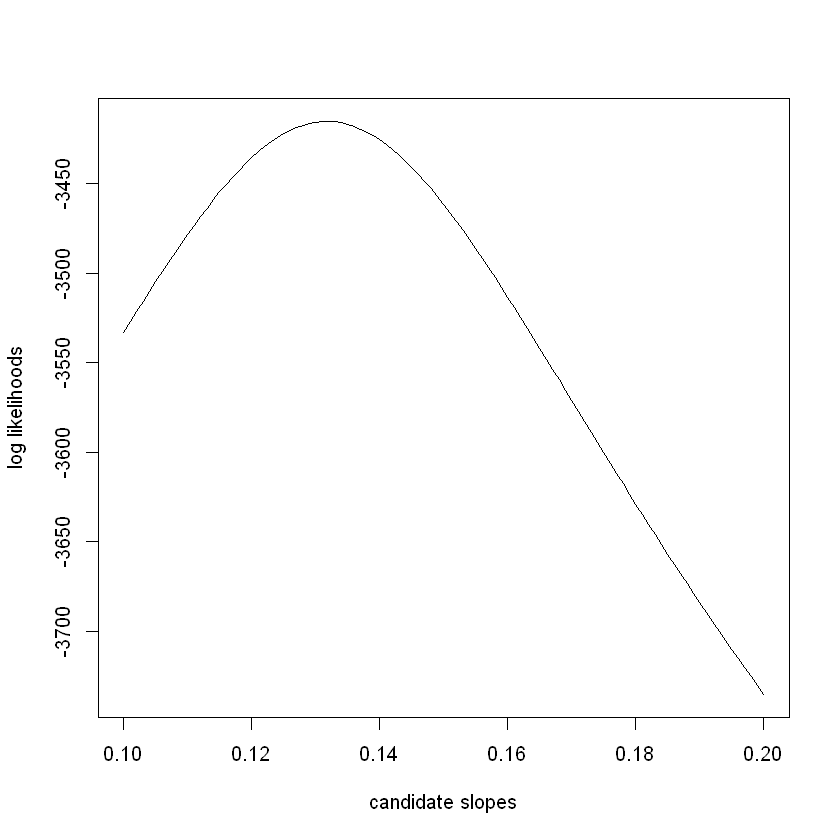

In [1]:
# Calculate several likelihoods from several slopes
cdi <- read.table("CDI.txt", header=TRUE)

fit <- lm(number_active_physicians~income_personal, data=cdi)
beta0 <- coef(fit)[1]
beta1 <- coef(fit)[2]


calc_residuals <- function(x, y, beta0, beta1) {
    fitted <- beta0 + beta1*x
    resid <- y - fitted
    return(resid)
}


calc_s <- function(resid) {
    s <- sqrt(sum(resid^2) / (length(resid) - 2))
    return(s)
}


calc_loglik <- function(x, y, beta0, beta1){
    resid <- calc_residuals(x, y, beta0, beta1)
    s <- calc_s(resid)
    constant <- 1 / (s * sqrt(2*pi))
    exp_term <- exp(resid^2 / (-2*s*s))
    likelihood <- sum(log(constant * exp_term))
    return(likelihood)
}




loglikFUN <- function(x) {
    calc_loglik(cdi$income_personal, 
                cdi$number_active_physicians, 
                beta0,x)
}

beta1s  <- seq(0.1, 0.2, 0.001)
logLiks <- tapply(beta1s, beta1s, loglikFUN)

plot(beta1s, logLiks, type="l", 
     xlab="candidate slopes", 
     ylab="log likelihoods")